In [1]:
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
print(np.__version__)

1.26.0


<h1>PCA</h1>

The independent variables used for the PCA are variables that are also typically used for ML genre classification

In [2]:
def extract_audio_features(audio_path):
    y, sr = librosa.load(audio_path, sr = 22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13) #13
    chroma = librosa.feature.chroma_stft(y=y, sr=sr) #12
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr) #7
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y) 
    rms = librosa.feature.rms(y=y) 

    # print(f"MFCCs:", len(np.mean(mfcc, axis=1)))
    # print(f"Chroma:", len(np.mean(chroma, axis=1)))
    # print(f"Spectral Contrast:", len(np.mean(spectral_contrast, axis=1)))
    # print(f"Zero Crossing Rate:", len(np.mean(zero_crossing_rate, axis=1)))
    # print(f"RMS:", len(np.mean(rms, axis=1))) #measures magnitude of the audio signal
    return np.hstack((np.mean(mfcc, axis=1), np.mean(chroma, axis=1), 
                        np.mean(spectral_contrast, axis=1), 
                        np.mean(zero_crossing_rate, axis=1), 
                        np.mean(rms, axis=1))) #we use the mean because we calculate all these variables per frame.


In [3]:
outputs = []
for filename in os.listdir('/Users/rgu/Desktop/UROPs/UROP4/diego_100_audios'):
        if filename.lower().endswith('.mp3'):
            outputs.append(extract_audio_features(f'/Users/rgu/Desktop/UROPs/UROP4/diego_100_audios/{filename}'))
outputs = np.array(outputs)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rgu/Desktop/UROPs/UROP4/diego_100_audios'

In [44]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(outputs)

In [45]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
print(principal_components) #shows the 2 principal components for all 46 songs

[[-1.50182833e+00 -4.16884527e+00]
 [-1.13069633e-01 -1.72200816e+00]
 [-3.63515777e+00  6.76539264e-01]
 [-2.53167453e+00 -3.82532863e-01]
 [-4.61600366e-01  2.20340691e+00]
 [-6.38668664e+00  2.01262368e+00]
 [-3.28597839e+00 -9.69898115e-01]
 [ 3.06143972e+00 -1.31085978e-01]
 [ 1.44379086e+00  1.17436789e+00]
 [-4.44364535e+00  1.65287224e+00]
 [-7.55562217e-01  1.22571413e+00]
 [-5.15768768e+00 -1.85001844e+00]
 [ 2.89550641e+00  3.47109137e+00]
 [-2.11726452e+00  3.21365615e-01]
 [ 1.10880324e+00  3.14917875e+00]
 [ 1.97638907e+00 -2.91076996e+00]
 [ 2.63269127e+00 -1.39335252e+00]
 [-1.61556117e+00  1.37621605e+00]
 [ 3.94580462e+00 -1.65366117e+00]
 [ 1.76177342e-01 -9.47287333e-01]
 [-7.10359776e-01  5.77490956e-01]
 [ 4.55906937e+00  1.15358697e+00]
 [ 6.79602147e+00 -2.27372424e+00]
 [-8.74166377e-01 -1.02951338e+00]
 [-1.76741509e+00  2.19485111e+00]
 [-9.42279659e-01  8.73805914e-02]
 [ 8.01727695e+00  1.68186261e+00]
 [-1.82235041e+00  9.16638807e-01]
 [ 1.21627748e+00 -5

In [60]:
column_names = ['MFCC_' + str(i) for i in range(1, 14)] + ['Chroma_' + str(i) for i in range(1, 13)] + ['Spectral_Contrast_' + str(i) for i in range(1,8)] + ['Zero_crossing_rate', 'RMS']
outputs_df = pd.DataFrame(outputs, columns=column_names)
print(outputs_df.head())

      MFCC_1      MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6  \
0 -97.855042  135.672119   9.303637  43.661156  11.701764   8.463287   
1 -57.491714  100.315628  24.473669  19.702520  13.496424  18.411259   
2 -39.402782   65.279892  12.822299  22.813959   2.981905   7.124956   
3 -78.488525   93.797073   9.725464  22.979483   1.061313   9.407542   
4 -57.343479   57.145229  11.922997  18.735708   6.543367   7.913982   

     MFCC_7     MFCC_8     MFCC_9   MFCC_10  ...  Chroma_12  \
0  4.814926   4.632211  -2.996553  5.055413  ...   0.354069   
1  2.716806   7.863942  -1.652251  5.022759  ...   0.283474   
2  1.095100   5.395236  -2.655563  6.975082  ...   0.386211   
3  4.634785  15.640405 -13.076438  1.426162  ...   0.422944   
4 -5.598506   8.809514  -4.677073  7.306396  ...   0.461535   

   Spectral_Contrast_1  Spectral_Contrast_2  Spectral_Contrast_3  \
0            22.404477            15.180902            19.460283   
1            20.995998            16.055847         

In [61]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

#show correlation coefficient between independent variables and pca
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(pca.explained_variance_))], index=outputs_df.columns)
print("Loadings (correlation coefficients):")
print(loadings_df)

Loadings (correlation coefficients):
                          PC1       PC2
MFCC_1              -0.519861  0.452870
MFCC_2               0.349149 -0.599373
MFCC_3              -0.230036 -0.535685
MFCC_4              -0.066496 -0.496231
MFCC_5              -0.471725 -0.583238
MFCC_6              -0.365657 -0.272782
MFCC_7              -0.498483 -0.590985
MFCC_8              -0.369789 -0.227273
MFCC_9              -0.445315 -0.299190
MFCC_10             -0.479534 -0.196028
MFCC_11             -0.596678 -0.289255
MFCC_12             -0.606132 -0.005789
MFCC_13             -0.436045 -0.078989
Chroma_1            -0.251026  0.051182
Chroma_2            -0.413044  0.191738
Chroma_3            -0.497579  0.192339
Chroma_4            -0.645212  0.060039
Chroma_5            -0.584844 -0.017605
Chroma_6            -0.595932  0.017684
Chroma_7            -0.652725  0.062275
Chroma_8            -0.358433 -0.167786
Chroma_9            -0.488605 -0.353496
Chroma_10           -0.515523 -0.228461
Chr

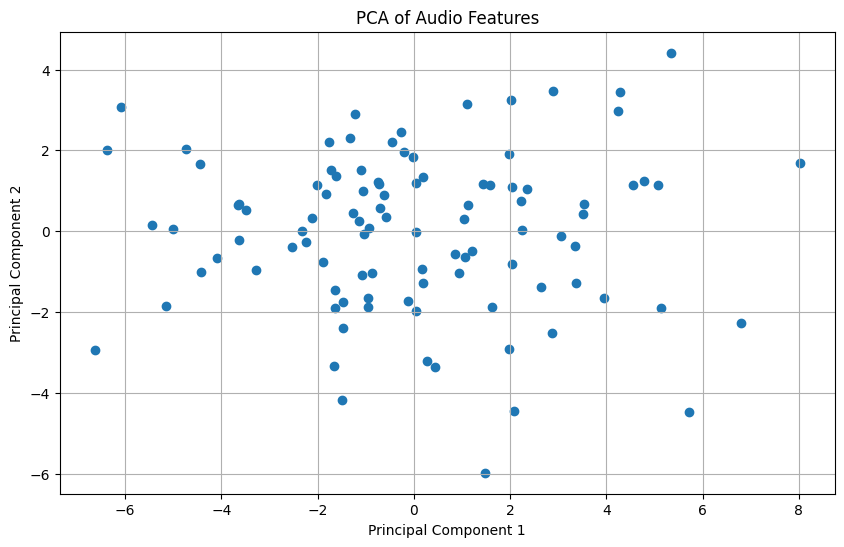

In [46]:
#visualize the PCs in a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA of Audio Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

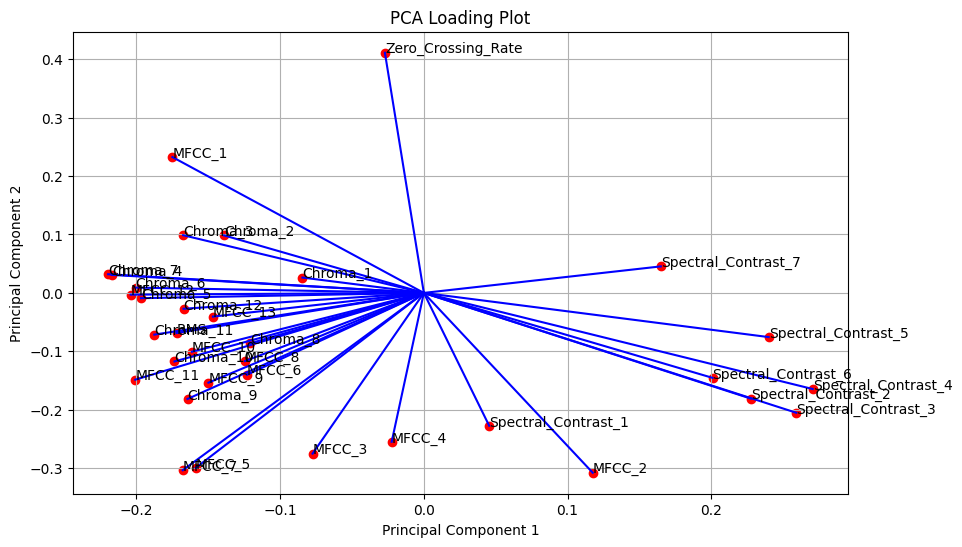

In [47]:
#visualize pcas using a loadings plot
loadings = pca.components_

plt.figure(figsize=(10, 6))
plt.scatter(loadings[0, :], loadings[1, :], color='red')
for i in range(loadings.shape[1]):
    plt.plot([0, loadings[0, i]], [0, loadings[1, i]], 'blue')

feature_names = ['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13',
                 'Chroma_1', 'Chroma_2', 'Chroma_3', 'Chroma_4', 'Chroma_5', 'Chroma_6', 'Chroma_7', 'Chroma_8', 'Chroma_9', 'Chroma_10', 'Chroma_11', 'Chroma_12',
                 'Spectral_Contrast_1', 'Spectral_Contrast_2', 'Spectral_Contrast_3', 'Spectral_Contrast_4', 'Spectral_Contrast_5', 'Spectral_Contrast_6', 'Spectral_Contrast_7',
                 'Zero_Crossing_Rate', 'RMS']

for i, feature in enumerate(feature_names):
    plt.text(loadings[0, i], loadings[1, i], feature)

plt.title('PCA Loading Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


<h1>Pearson's Correlation Matrix across independent variables</h1>

In [64]:
#computer pearson's correlation across independent variables
correlation_matrix = outputs_df.corr()

print("Pearson's Correlation Matrix: \n")
print(correlation_matrix)



Pearson's Correlation Matrix: 

                       MFCC_1    MFCC_2    MFCC_3    MFCC_4    MFCC_5  \
MFCC_1               1.000000 -0.495120 -0.147904 -0.301209  0.002418   
MFCC_2              -0.495120  1.000000  0.007440  0.205603  0.035282   
MFCC_3              -0.147904  0.007440  1.000000  0.086482  0.521321   
MFCC_4              -0.301209  0.205603  0.086482  1.000000  0.287783   
MFCC_5               0.002418  0.035282  0.521321  0.287783  1.000000   
MFCC_6              -0.015430 -0.051692  0.116769  0.472607  0.344008   
MFCC_7               0.051353  0.096156  0.350689  0.276672  0.561428   
MFCC_8               0.184412 -0.128680  0.096204  0.242998  0.285640   
MFCC_9               0.086921  0.066340  0.115623  0.295621  0.354943   
MFCC_10              0.347258 -0.165774  0.193270 -0.011887  0.288351   
MFCC_11              0.143272  0.011462  0.331780  0.135759  0.372490   
MFCC_12              0.357142 -0.240432  0.056768  0.040759  0.154518   
MFCC_13            

In [88]:
correlation_matrix.to_csv('/Users/rgu/Desktop/UROPs/UROP4/pearsons_correlation_matrix.csv')

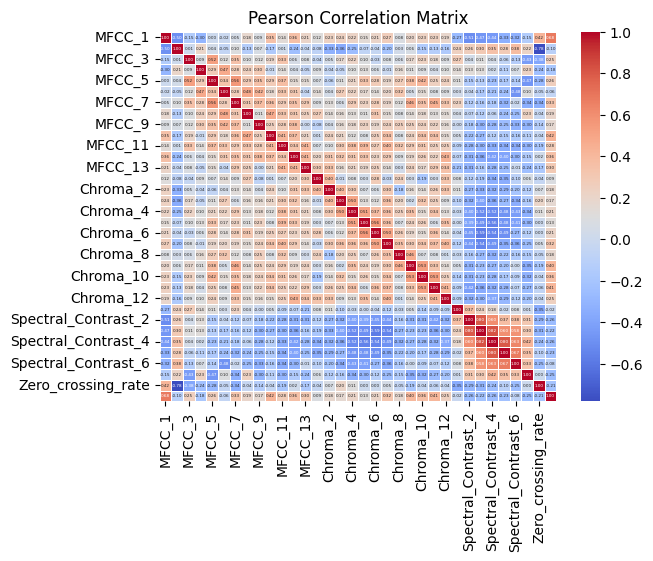

In [80]:
#Visualize the Pearson's Correlation Matrix
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5, annot_kws={"size": 3})
plt.title('Pearson Correlation Matrix')
plt.show()

<h1>Pearson's with water loss and independent variables </h1>

In [ ]:
print(outputs_df)

In [103]:
frame1 = pd.read_csv('/Users/rgu/Desktop/UROPs/UROP4/avg_diego_47.csv')
display(frame1)

,song_id,avg_weight0,avg_weight1,avg_water_loss
0,0,2.15330,2.10955,0.04375
1,1,2.12135,2.08655,0.03480
2,2,1.91580,1.86810,0.04770
3,3,1.82995,1.77550,0.05445
4,4,2.44275,2.37980,0.06295
5,5,2.21200,2.16675,0.04525
6,6,2.43565,2.39155,0.04410
7,7,2.48585,2.44075,0.04510
8,8,3.27330,3.21245,0.06085
9,9,3.24150,3.19515,0.04635


In [105]:
pearson_frame = outputs_df[:47]
pearson_frame['avg_water_loss'] = frame1['avg_water_loss']
display(pearson_frame)

/var/folders/34/1ttg_lbn35dc4rbjqq8z0rth0000gn/T/ipykernel_9967/1939346320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pearson_frame['avg_water_loss'] = frame1['avg_water_loss']


,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,...,Spectral_Contrast_1,Spectral_Contrast_2,Spectral_Contrast_3,Spectral_Contrast_4,Spectral_Contrast_5,Spectral_Contrast_6,Spectral_Contrast_7,Zero_crossing_rate,RMS,avg_water_loss
0,-97.855042,135.672119,9.303637,43.661156,11.701764,8.463287,4.814926,4.632211,-2.996553,5.055413,...,22.404477,15.180902,19.460283,18.445573,17.748717,20.001675,48.807486,0.034923,0.298124,0.04375
1,-57.491714,100.315628,24.473669,19.702520,13.496424,18.411259,2.716806,7.863942,-1.652251,5.022759,...,20.995998,16.055847,18.854475,18.565686,18.523198,17.432226,48.269158,0.057866,0.254989,0.03480
2,-39.402782,65.279892,12.822299,22.813959,2.981905,7.124956,1.095100,5.395236,-2.655563,6.975082,...,19.340803,13.797597,16.896664,16.698401,18.815076,17.664029,47.102981,0.111268,0.307039,0.04770
3,-78.488525,93.797073,9.725464,22.979483,1.061313,9.407542,4.634785,15.640405,-13.076438,1.426162,...,22.340985,14.924980,18.342329,17.555879,16.490619,17.438851,48.427292,0.055871,0.274789,0.05445
4,-57.343479,57.145229,11.922997,18.735708,6.543367,7.913982,-5.598506,8.809514,-4.677073,7.306396,...,21.166888,16.026787,18.047249,17.637104,18.720990,17.231853,48.264708,0.153140,0.157292,0.06295
5,32.429810,45.049812,-11.922343,15.327445,2.912305,13.343133,10.220080,12.013689,0.043578,7.634807,...,21.927059,13.309066,15.994459,17.103633,16.221482,16.652570,47.237668,0.149474,0.383212,0.04525
6,5.543824,96.795837,-1.808544,28.405037,7.693063,7.052866,5.288288,4.620232,3.947863,8.394361,...,19.975416,14.076272,17.140763,17.162865,17.362398,17.848004,46.909391,0.065649,0.426958,0.04410
7,-114.339478,92.577919,23.610620,20.727554,6.698894,1.720080,-11.216740,8.023093,-10.078624,2.995737,...,16.531800,15.116120,20.610288,21.189969,20.262315,20.395202,47.916980,0.078427,0.180170,0.04510
8,-31.672535,89.083832,-18.296354,31.963579,-2.865620,-1.935907,-0.605700,3.865989,3.561862,6.731867,...,23.274672,15.507405,18.046359,19.309041,18.427423,20.373995,48.809178,0.138766,0.232057,0.06085
9,7.649179,71.739197,-0.525209,21.672132,3.606880,10.078616,0.123210,9.018223,3.056161,2.394945,...,21.766401,13.995731,16.606489,15.964208,16.157934,15.949980,46.809525,0.134425,0.279994,0.04635


In [119]:
#Compute Pearson's Correlation Coefficients between the independent variables and dependent variables
correlation_results = pd.DataFrame()

for column in pearson_frame.columns.drop('avg_water_loss'):
    correlation, p_val = pearsonr(pearson_frame[column], pearson_frame['avg_water_loss'])
    correlation_results[column] = [correlation, p_val]
correlation_results.insert(0, 'values',['correlation', 'p-val'])

In [120]:
display(correlation_results)

,values,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,Chroma_12,Spectral_Contrast_1,Spectral_Contrast_2,Spectral_Contrast_3,Spectral_Contrast_4,Spectral_Contrast_5,Spectral_Contrast_6,Spectral_Contrast_7,Zero_crossing_rate,RMS
0,correlation,0.068505,-0.111044,0.012493,-0.049038,-0.196421,-0.250018,0.051137,-0.043183,-0.097655,...,-0.072672,0.049921,0.090979,0.111808,0.292589,0.213622,0.285406,0.203730,0.190121,0.023401
1,p-val,0.647285,0.457430,0.933578,0.743417,0.185748,0.090091,0.732834,0.773185,0.513739,...,0.627362,0.738958,0.543061,0.454323,0.045957,0.149362,0.051821,0.169582,0.200540,0.875931


In [143]:
for col,val in correlation_results.iloc[1].items(): #iloc finds the row
    if type(val) == np.float64 and val <= 0.05:
        print(col, 'p-value:', val, 'correlation coefficient:',correlation_results[col][0])

Chroma_5 p-value: 0.026528712366941907 correlation coefficient: -0.32353846830559524
Spectral_Contrast_4 p-value: 0.04595714215421452 correlation coefficient: 0.29258885209331237


In [144]:
correlation_results.to_csv('/Users/rgu/Desktop/UROPs/UROP4/pearson_indep_dep.csv')

In [145]:
outputs_df.to_csv('/Users/rgu/Desktop/UROPs/UROP4/vars_1.csv', index=False)